# OpenML in Python 
OpenML is an online collaboration platform for machine learning: 

* Share/reuse machine learning datasets, algorithms, models, experiments
* Well documented/annotated datasets, uniform access
* APIs in Java, R, Python\*,... to download/upload everything
* Better reproducibility of experiments, reuse of machine learning models 
* Works well with machine learning libraries such as scikit-learn
* Large scale benchmarking, compare to state of the art

In [1]:
# General imports and settings
from preamble import *
%matplotlib inline
InteractiveShell.ast_node_interactivity = "all"
HTML('''<style>html, body{overflow: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

## Authentication

* Create an OpenML account (free) on http://www.openml.org. 
* After logging in, open your account page (avatar on the top right)
* Open 'Account Settings', then 'API authentication' to find your API key.

There are two ways to authenticate:  

* Create a plain text file `~/.openml/config` with the line 'apikey=MYKEY', replacing MYKEY with your API key.
* Run the code below, replacing 'MYKEY' with your API key.

In [2]:
# If you don't keep your API key in the config file, you can also specify it in code (but never share your key!)
# oml.config.apikey = MYKEY

# Data sets
We can list, select, and download all OpenML datasets

### List datasets

In [4]:
datalist = oml.datasets.list_datasets() # Returns a dict
datalist = pd.DataFrame.from_dict(datalist, orient='index') # Create a DataFrame
print("First 10 of %s active datasets..." % len(datalist))
datalist[:10][['did','name','NumberOfInstances',
               'NumberOfFeatures','NumberOfClasses']]

First 10 of 2518 active datasets...


did             name  NumberOfInstances  NumberOfFeatures  NumberOfClasses
2     2           anneal                898                39                5
3     3         kr-vs-kp               3196                37                2
4     4            labor                 57                17                2
5     5       arrhythmia                452               280               13
6     6           letter              20000                17               26
7     7        audiology                226                70               24
8     8  liver-disorders                345                 7               16
9     9            autos                205                26                6
10   10            lymph                148                19                4
11   11    balance-scale                625                 5                3

There are many properties that we can query

In [5]:
list(datalist)
datalist = datalist[['did','name','NumberOfInstances',
               'NumberOfFeatures','NumberOfClasses']]

['name',
 'NumberOfFeatures',
 'format',
 'NumberOfNumericFeatures',
 'NumberOfClasses',
 'NumberOfSymbolicFeatures',
 'NumberOfInstances',
 'MinorityClassSize',
 'NumberOfInstancesWithMissingValues',
 'MajorityClassSize',
 'did',
 'status',
 'NumberOfMissingValues',
 'MaxNominalAttDistinctValues']

and we can filter or sort on all of them

In [6]:
datalist[datalist.NumberOfInstances>10000
        ].sort(['NumberOfInstances'])[:20]

did                                  name  NumberOfInstances  \
23515  23515                                sulfur              10081   
981      981                    kdd_internet_usage              10108   
372      372                        internet_usage              10108   
1536    1536                          volcanoes-b6              10130   
4562    4562                         InternetUsage              10168   
1531    1531                          volcanoes-b1              10176   
1534    1534                          volcanoes-b4              10190   
1459    1459                 artificial-characters              10218   
1478    1478                                   har              10299   
1533    1533                          volcanoes-b3              10386   
1532    1532                          volcanoes-b2              10668   
1053    1053                                   jm1              10885   
1414    1414  Kaggle_bike_sharing_demand_challange              10886   
1044    1044                         eye_movements              10936   
1019    1019                             pendigits              10992   
32        32                             pendigits              10992   
4534    4534                      PhishingWebsites              11055   
399      399                             ohscal.wc              11162   
310      310                           mammography              11183   
1568    1568                               nursery              12958   

       NumberOfFeatures  NumberOfClasses  
23515                 7               -1  
981                  69                2  
372                  72               46  
1536                  4                5  
4562                 72               -1  
1531                  4                5  
1534                  4                5  
1459                  8               10  
1478                562                6  
1533                  4                5  
1532                  4                5  
1053                 22                2  
1414                 12              822  
1044                 28                3  
1019                 17                2  
32                   17               10  
4534                 31                2  
399               11466               10  
310                   7                2  
1568                  9                4

or find specific ones

In [10]:
datalist.query('name == "MagicTelescope"')

did            name  NumberOfInstances  NumberOfFeatures  \
1120  1120  MagicTelescope              19020                12   

      NumberOfClasses  
1120                2

In [8]:
datalist.query('NumberOfClasses > 50')

did                                  name  NumberOfInstances  \
190      190                              mbagrade                 61   
1092    1092                                 Crash                352   
1414    1414  Kaggle_bike_sharing_demand_challange              10886   
1491    1491             one-hundred-plants-margin               1600   
1492    1492              one-hundred-plants-shape               1600   
1493    1493            one-hundred-plants-texture               1599   
4546    4546                                Plants              44940   
4552    4552                     BachChoralHarmony               5665   
40601  40601                             RAM_price                333   
40753  40753               delays_zurich_transport            5465575   
40916  40916                    HappinessRank_2015                158   
41021  41021                             Moneyball               1232   
41022  41022             Short_Track_Speed_Skating               5125   

       NumberOfFeatures  NumberOfClasses  
190                   3               57  
1092                 14              307  
1414                 12              822  
1491                 65              100  
1492                 65              100  
1493                 65              100  
4546                 16               57  
4552                 17              102  
40601                 3              219  
40753                15             4082  
40916                12              157  
41021                15               87  
41022                27             2954

Download a specific dataset. This is done based on the dataset ID (called 'did').

In [11]:
dataset = oml.datasets.get_dataset(1120)

print("This is dataset '%s', the target feature is '%s'" % 
      (dataset.name, dataset.default_target_attribute))
print("URL: %s" % dataset.url)
print(dataset.description[:500])

This is dataset 'MagicTelescope', the target feature is 'class:'
URL: https://www.openml.org/data/v1/download/54003/MagicTelescope.arff
**Author**: R. K. Bock. Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)  
Donated by P. Savicky, Institute of Computer Science, AS of CR, Czech Republic  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope)  
**Please cite**: Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T., Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S., Vaicilius, A., Wittek W. (2004). 
Methods for multidimensional event classification: a case stud


Convert the data to a DataFrame for easier processing/plotting

In [13]:
X, y, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute, 
    return_attribute_names=True)
magic = pd.DataFrame(X, columns=attribute_names)
magic['class'] = y
print(magic[:10])

   fLength:  fWidth:  fSize:  fConc:  ...    fM3Trans:  fAlpha:  fDist:  class
0     28.80    16.00    2.64    0.39  ...        -8.20    40.09   81.88      0
1     31.60    11.72    2.52    0.53  ...        -9.96     6.36  205.26      0
2    162.05   136.03    4.06    0.04  ...       -45.22    76.96  256.79      0
3     23.82     9.57    2.34    0.61  ...        -7.15    10.45  116.74      0
4     75.14    30.92    3.16    0.32  ...        21.84     4.65  356.46      0
5     51.62    21.15    2.91    0.24  ...         9.81     3.61  238.10      0
6     48.25    17.36    3.03    0.25  ...        10.59     4.79  219.09      0
7     26.79    13.76    2.55    0.42  ...        -2.93     0.81  237.13      0
8     96.23    46.52    4.15    0.08  ...        43.18     4.85  248.23      0
9     46.76    15.20    2.58    0.34  ...        -6.68     7.88  102.25      0

[10 rows x 11 columns]


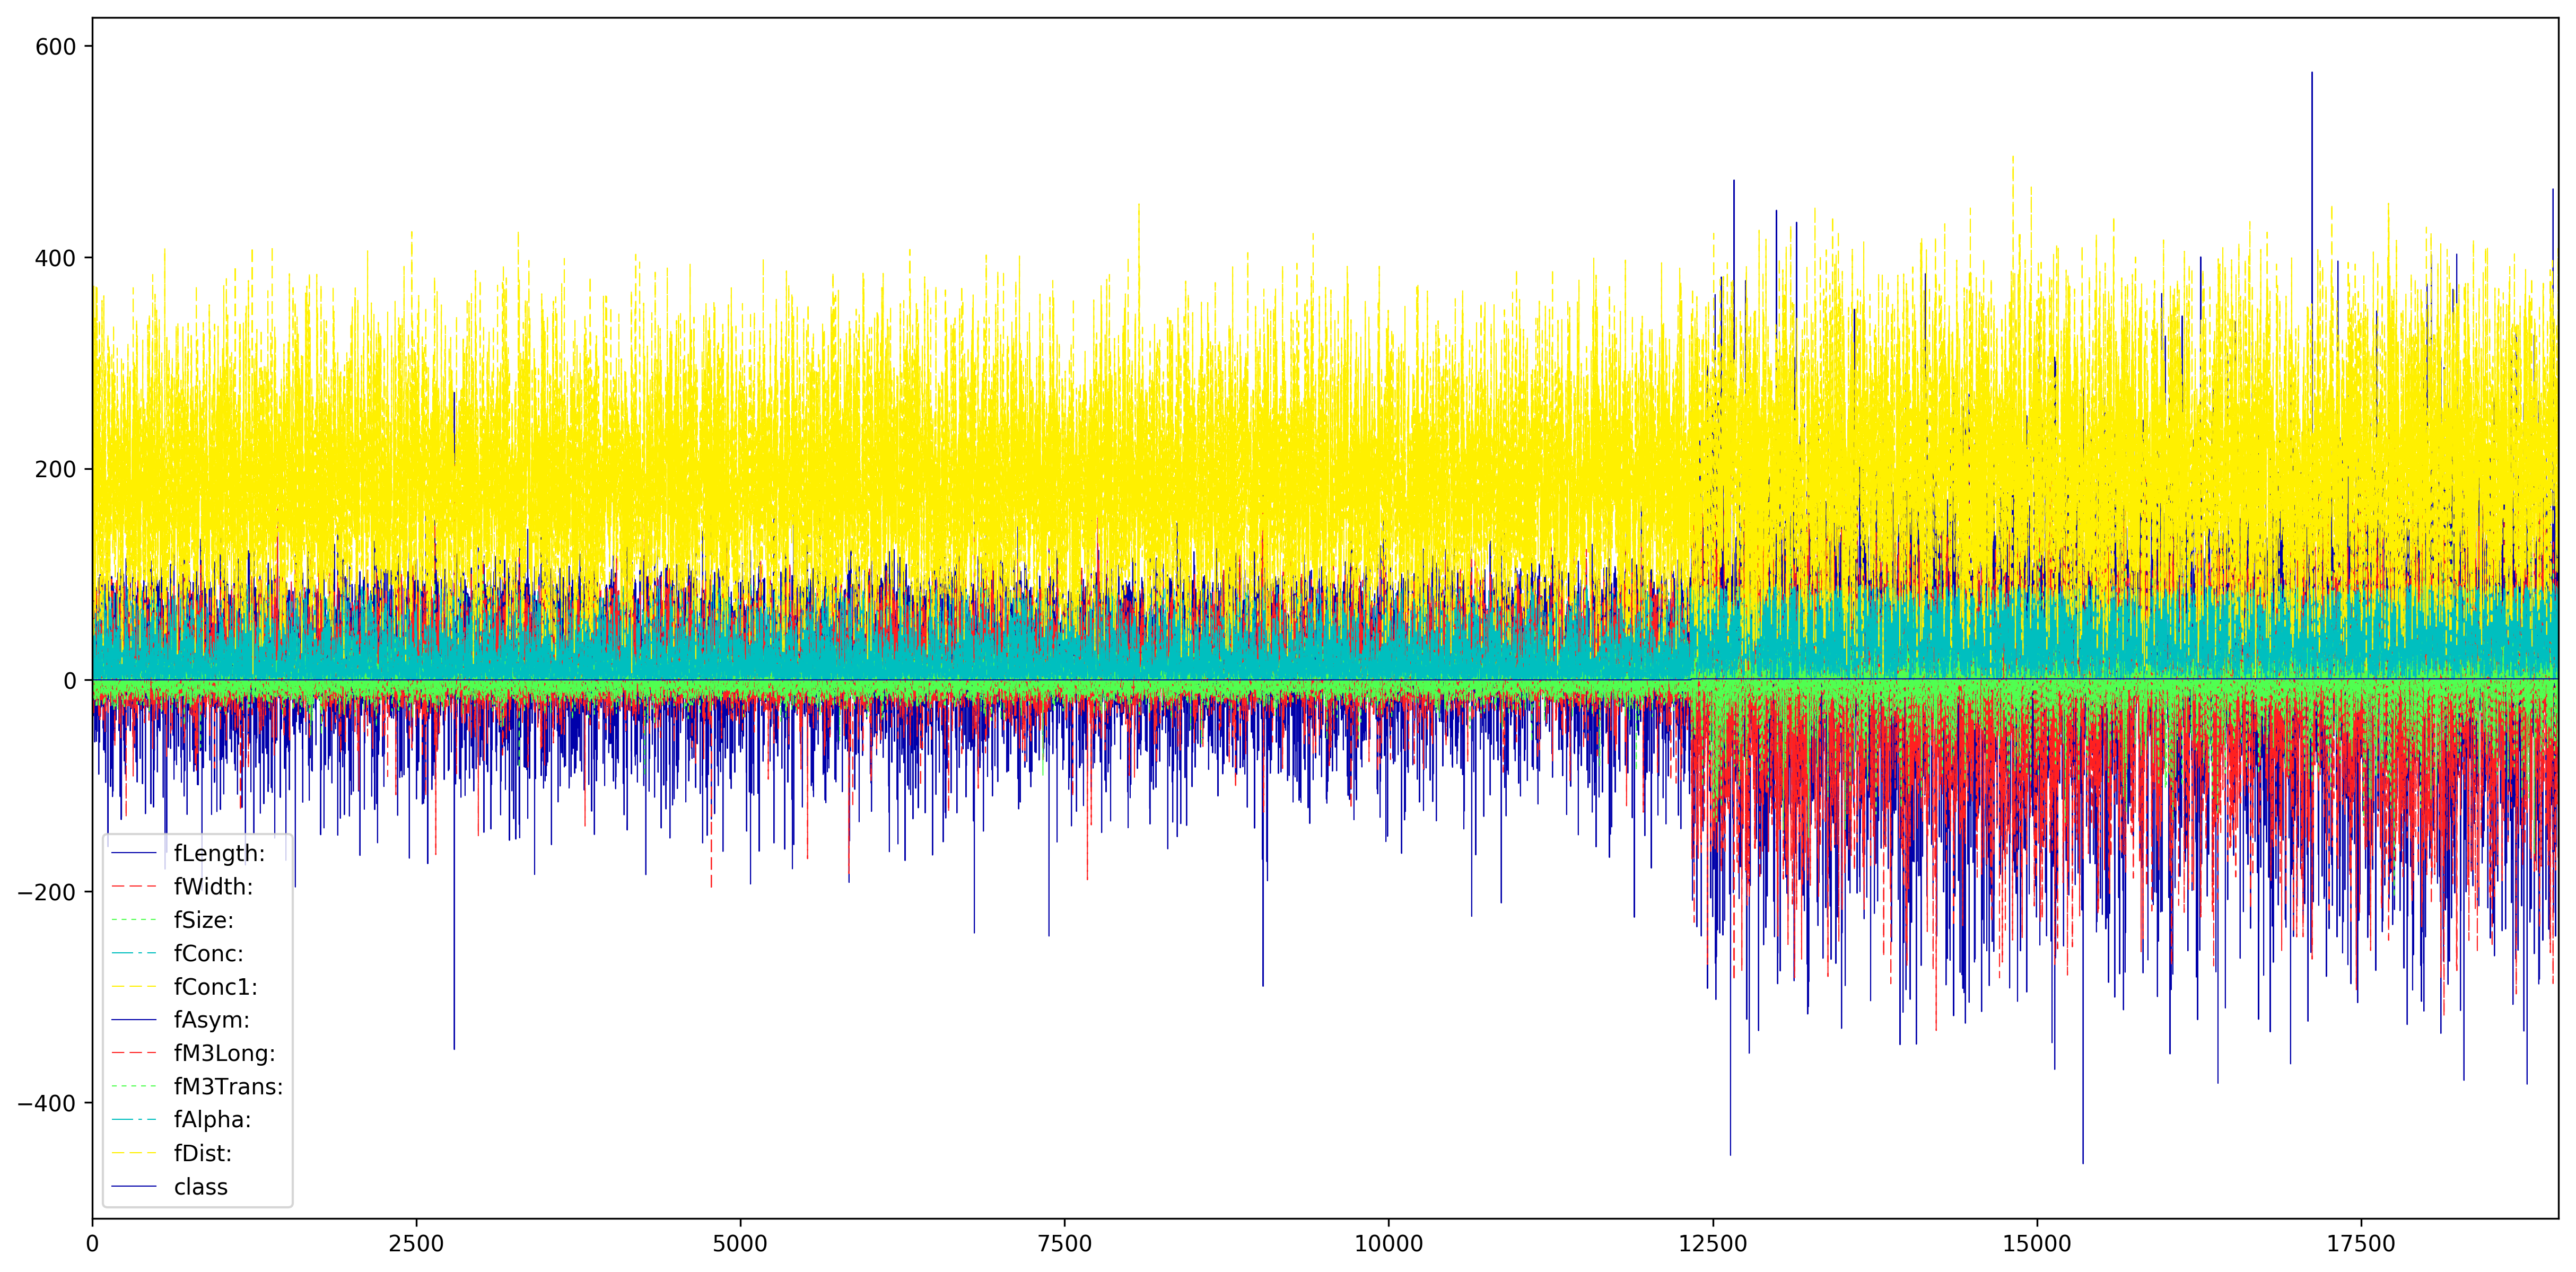

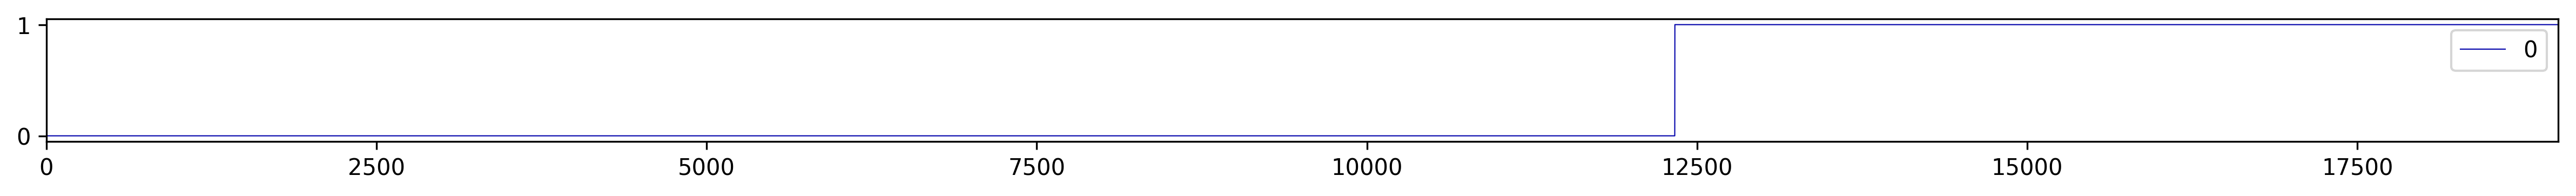

In [15]:
magic.plot(figsize=(20,10))
pd.DataFrame(y).plot(figsize=(20,1));

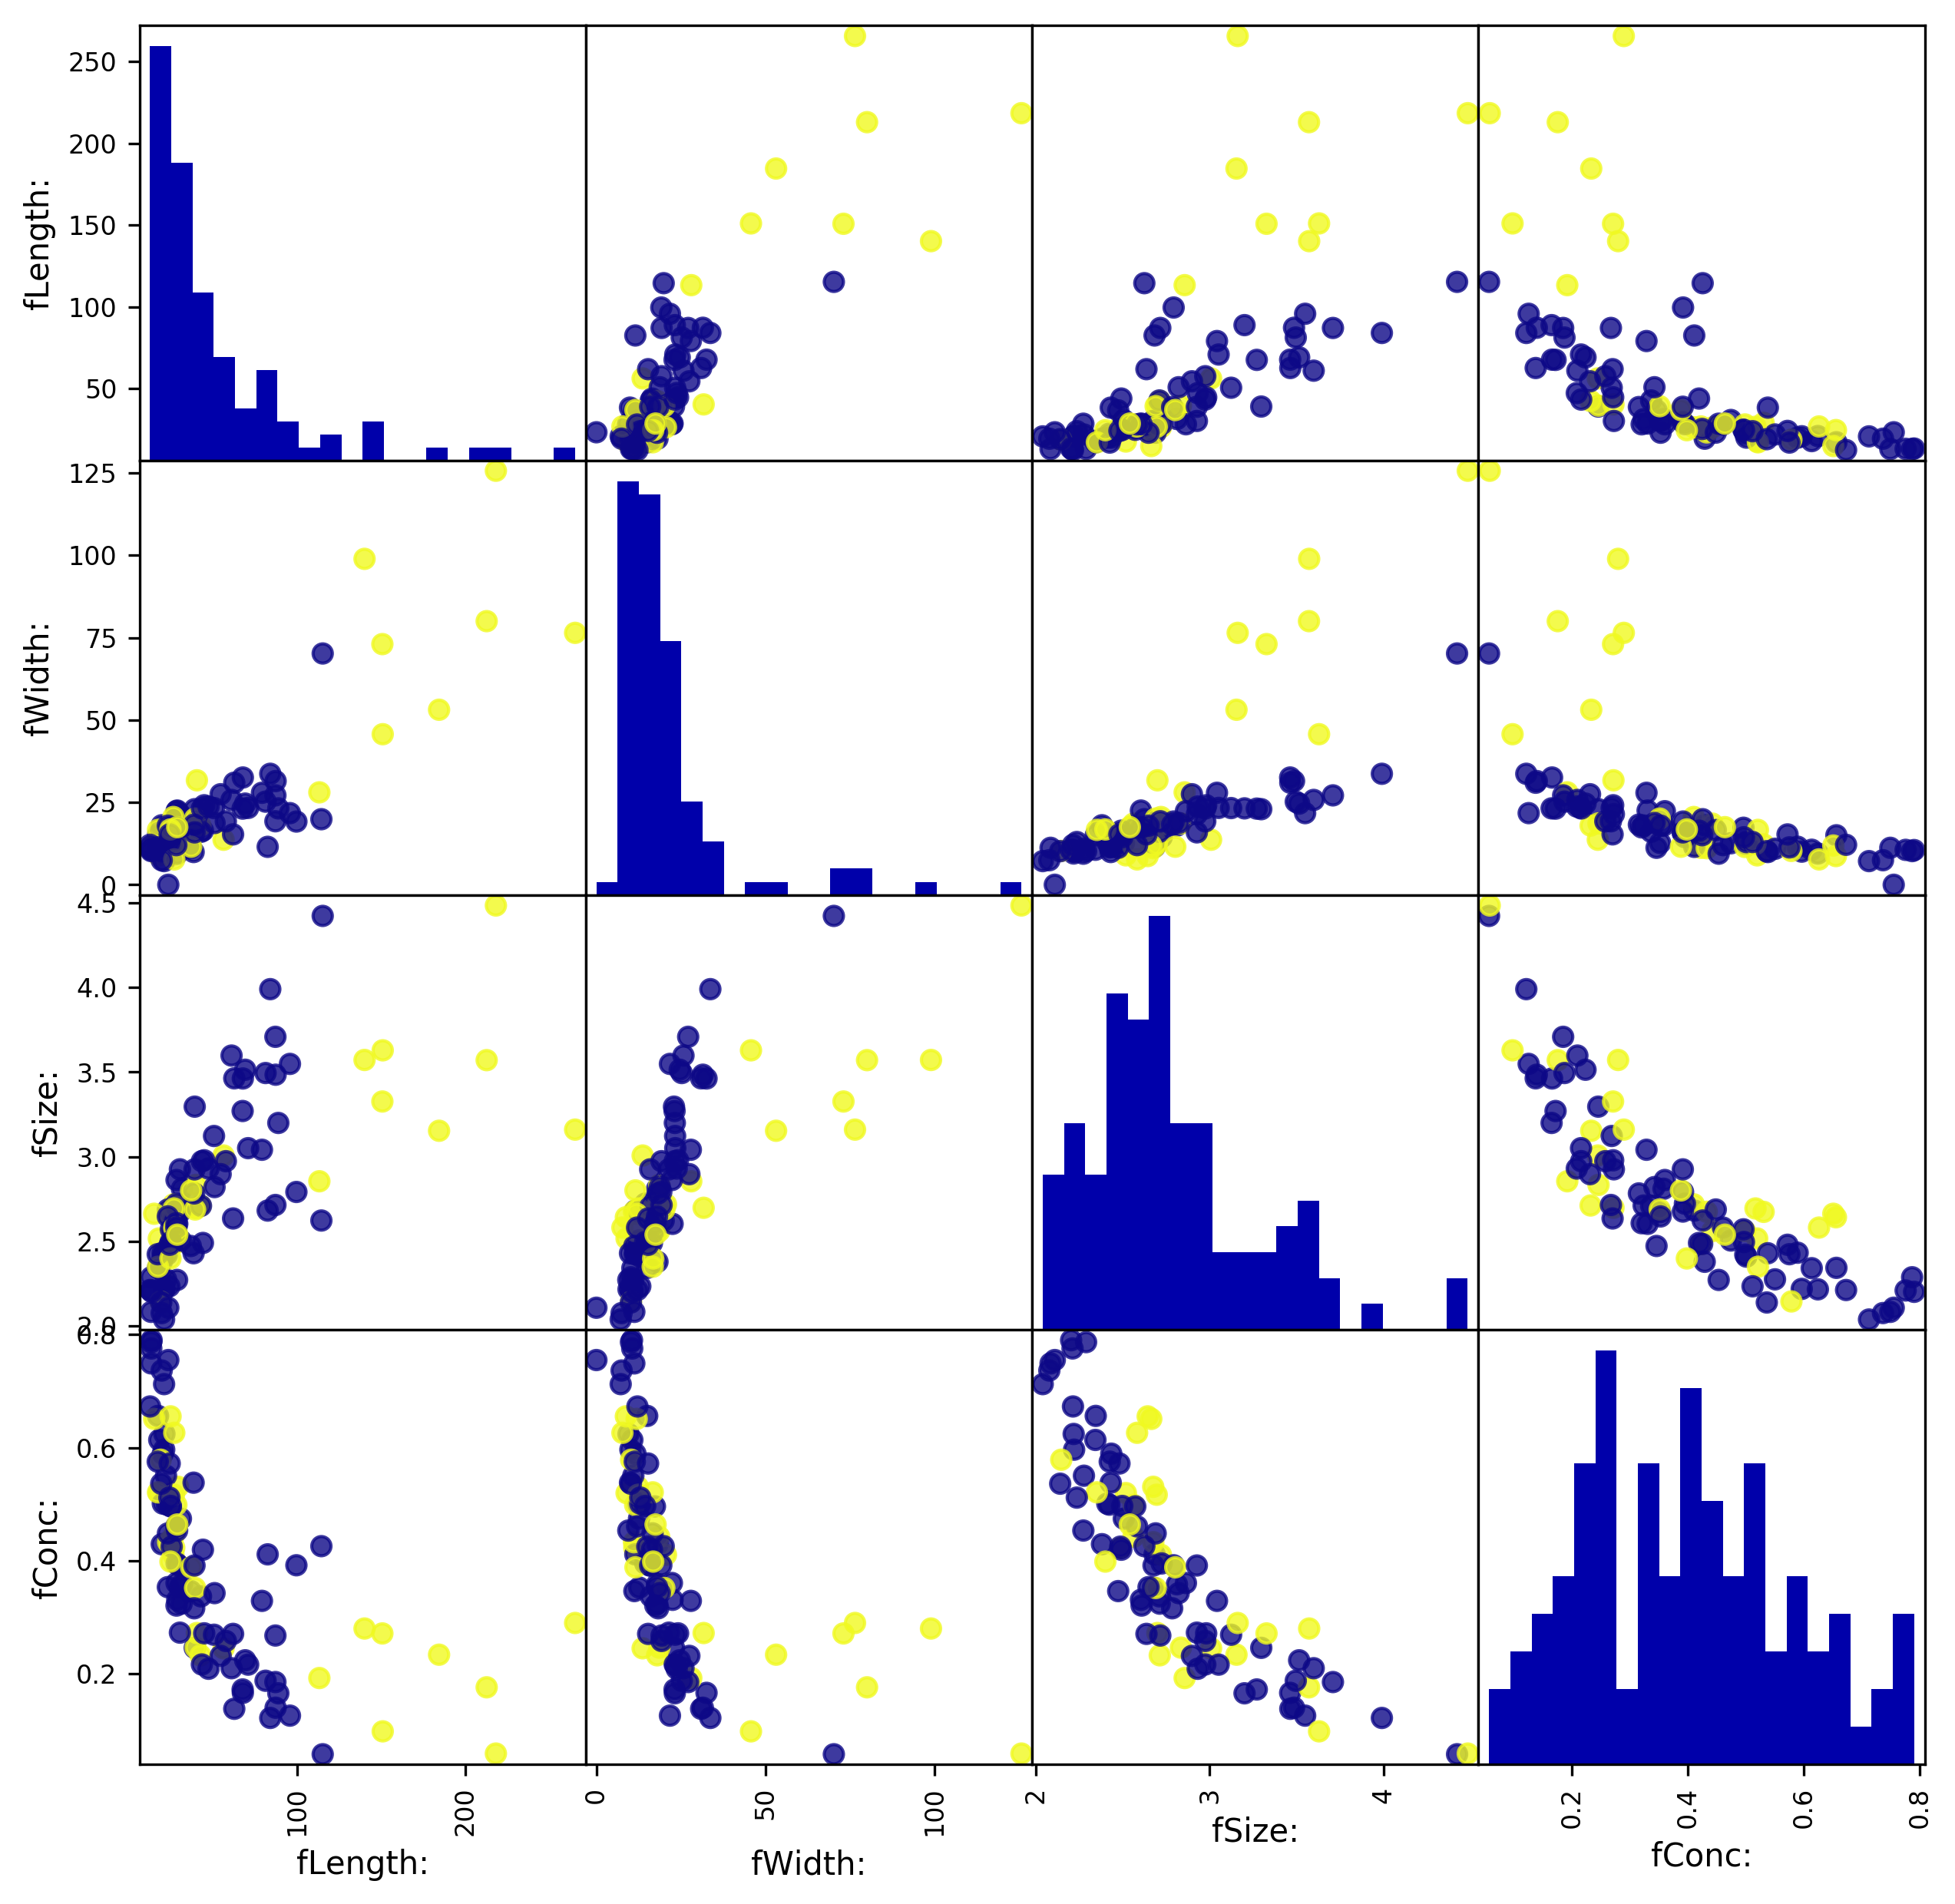

In [14]:
magics = magic.sample(n=1000)
_ = pd.scatter_matrix(magics.iloc[:100,:4], c=magics[:100]['class'], figsize=(10, 10), 
                  marker='o', hist_kwds={'bins': 20}, 
                  alpha=.8, cmap='plasma')

## Train models
Train a scikit-learn model on the data manually

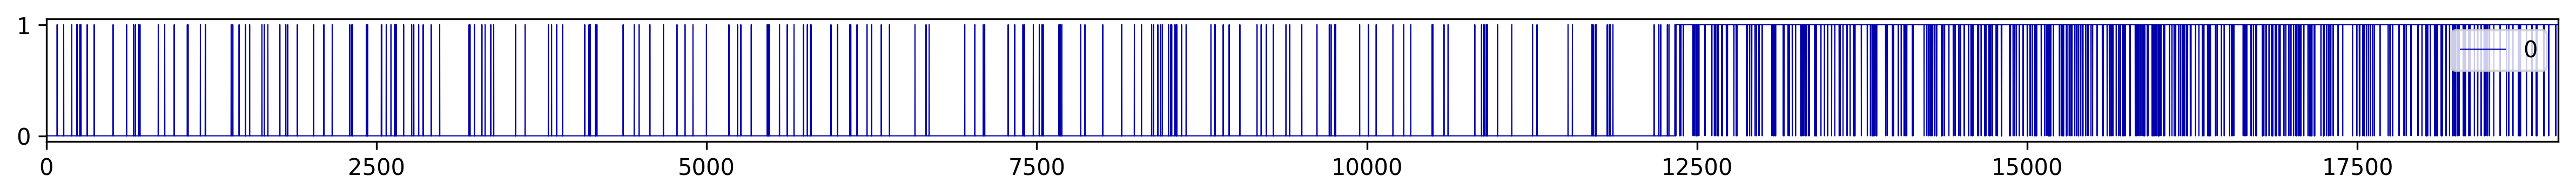

In [18]:
from sklearn import ensemble
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
pd.DataFrame(clf.predict(X)).plot(figsize=(20,1));

And evaluate

In [24]:
kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
results = model_selection.cross_val_score(clf, X, y, cv=kfold)
print("Accuracy: %.3f%% (+- %.3f)" % (results.mean(), results.std()))

Accuracy: 0.845% (+- 0.061)


Note: You can also ask which features are categorical to do your own encoding

In [19]:
from sklearn import preprocessing
dataset = oml.datasets.get_dataset(10) # Lymph dataset
X, y, categorical = dataset.get_data(
    target=dataset.default_target_attribute,
    return_categorical_indicator=True)
print("Categorical features: %s" % categorical)
enc = preprocessing.OneHotEncoder(categorical_features=categorical)
X = enc.fit_transform(X)
clf.fit(X, y)

Categorical features: [True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, False]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Tasks

To run benchmarks consistently (also across studies and tools), OpenML offers Tasks, which include specific train-test splits and other information to define a scientific task. Tasks are typically created via the website by the dataset provider.

## Listing tasks

In [20]:
task_list = oml.tasks.list_tasks(size=5000) # Get first 5000 tasks

mytasks = pd.DataFrame(task_list).transpose()
print("First 5 of %s tasks:" % len(mytasks))
print(mytasks.columns)

First 5 of 5000 tasks:
Index(['MajorityClassSize', 'MaxNominalAttDistinctValues', 'MinorityClassSize',
       'NumberOfClasses', 'NumberOfFeatures', 'NumberOfInstances',
       'NumberOfInstancesWithMissingValues', 'NumberOfMissingValues',
       'NumberOfNumericFeatures', 'NumberOfSymbolicFeatures', 'cost_matrix',
       'did', 'estimation_procedure', 'evaluation_measures', 'name',
       'number_samples', 'quality_measure', 'source_data',
       'source_data_labeled', 'status', 'target_feature',
       'target_feature_event', 'target_feature_left', 'target_feature_right',
       'target_value', 'task_type', 'tid', 'ttid'],
      dtype='object')


In [25]:
mytasks = mytasks[['tid','did','name','task_type','estimation_procedure','evaluation_measures']]
print(mytasks.head())

  tid did        name                  task_type     estimation_procedure  \
2   2   2      anneal  Supervised Classification  10-fold Crossvalidation   
3   3   3    kr-vs-kp  Supervised Classification  10-fold Crossvalidation   
4   4   4       labor  Supervised Classification  10-fold Crossvalidation   
5   5   5  arrhythmia  Supervised Classification  10-fold Crossvalidation   
6   6   6      letter  Supervised Classification  10-fold Crossvalidation   

   evaluation_measures  
2  predictive_accuracy  
3                  NaN  
4  predictive_accuracy  
5  predictive_accuracy  
6                  NaN  


Search for the tasks you need

In [26]:
print(mytasks.query('name=="MagicTelescope"'))

         tid   did            name                              task_type  \
3954    3954  1120  MagicTelescope              Supervised Classification   
4659    4659  1120  MagicTelescope              Supervised Classification   
7228    7228  1120  MagicTelescope  Supervised Data Stream Classification   
10067  10067  1120  MagicTelescope                         Learning Curve   

                   estimation_procedure  evaluation_measures  
3954            10-fold Crossvalidation                  NaN  
4659   10 times 10-fold Crossvalidation  predictive_accuracy  
7228        Interleaved Test then Train                  NaN  
10067            10-fold Learning Curve                  NaN  


## Download tasks

In [27]:
task = oml.tasks.get_task(3954)
pprint(vars(task))

{'class_labels': ['g', 'h'],
 'cost_matrix': None,
 'dataset_id': 1120,
 'estimation_parameters': {'number_folds': '10',
                           'number_repeats': '1',
                           'percentage': '',
                           'stratified_sampling': 'true'},
 'estimation_procedure': {'data_splits_url': 'https://www.openml.org/api_splits/get/3954/Task_3954_splits.arff',
                          'parameters': {'number_folds': '10',
                                         'number_repeats': '1',
                                         'percentage': '',
                                         'stratified_sampling': 'true'},
                          'type': 'crossvalidation'},
 'evaluation_measure': None,
 'split': None,
 'target_name': 'class:',
 'task_id': 3954,
 'task_type': 'Supervised Classification',
 'task_type_id': 1}


# Runs: Train models on tasks
We can run (many) scikit-learn algorithms on (many) OpenML tasks.

In [29]:
task = oml.tasks.get_task(3954)
clf = ensemble.RandomForestClassifier(n_estimators=100)
flow = oml.flows.sklearn_to_flow(clf)
run = oml.runs.run_flow_on_task(task, flow)
run.model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42856, verbose=0,
            warm_start=False)

Share the run on the OpenML server
* Note: if the exact same experiment has already been done (probably by you), it will just return the run ID from the previous run

In [30]:
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))

Uploaded to http://www.openml.org/r/8867787


### It also works with pipelines

In [32]:
from sklearn import pipeline, ensemble, preprocessing
from openml import tasks,runs, datasets
task = tasks.get_task(59)
pipe = pipeline.Pipeline(steps=[
            ('Imputer', preprocessing.Imputer(strategy='median')),
            ('OneHotEncoder', preprocessing.OneHotEncoder(sparse=False, handle_unknown='ignore')),
            ('Classifier', ensemble.RandomForestClassifier())
           ])
flow = oml.flows.sklearn_to_flow(pipe)
run = oml.runs.run_flow_on_task(task, flow)
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))

Uploaded to http://www.openml.org/r/8867788


## All together
Train any model on any OpenML dataset and upload to OpenML in a few lines of code

In [34]:
from sklearn.linear_model import LogisticRegression

task = oml.tasks.get_task(3954)
clf = LogisticRegression()
flow = oml.flows.sklearn_to_flow(clf)
run = oml.runs.run_flow_on_task(task, flow)
run.model
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=14800, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Uploaded to http://www.openml.org/r/8867789


* You can (of course) evaluate models in a loop
* E.g. for easy benchmarking:

In [36]:
import openml as oml
from sklearn import neighbors

for task_id in [14951,10103,9945]:
    task = oml.tasks.get_task(task_id)
    data = oml.datasets.get_dataset(task.dataset_id)
    clf = neighbors.KNeighborsClassifier(n_neighbors=7)
    flow = oml.flows.sklearn_to_flow(clf)
    run = oml.runs.run_flow_on_task(task, flow)
    myrun = run.publish()
    print("kNN on %s: http://www.openml.org/r/%d" % (data.name, myrun.run_id))

kNN on eeg-eye-state: http://www.openml.org/r/8867790
kNN on volcanoes-a1: http://www.openml.org/r/8867791
kNN on walking-activity: http://www.openml.org/r/8867792


### Download everyone else's results on the same dataset
Check whether other people built better models on the same task by downloading their evaluations (computed on the OpenML server) and comparing directly against them.

In [ ]:
myruns = oml.runs.list_runs(task=[3954],size=10000)
scores = []
for id, _ in myruns.items():
    run = oml.runs.get_run(id)
    if str.startswith(run.flow_name, 'sklearn'):
        scores.append({"flow":run.flow_name, "score":run.evaluations['predictive_accuracy']})

In [ ]:
fig, ax = pyplot.subplots(figsize=(8, 12))
sns.violinplot(x="score", y="flow", data=pd.DataFrame(scores), scale="width", palette="Set3", cut=0);